Dans un premier temps, voilà à quoi ressemblerait le modèle analyser. 

![pivoting_wall.png](../memoire_makette/pivoting_wall.png)

The blue rectangle represents the bin that we want to rotate by $90^\circ$ in order to align its long side with wall 1. The initial and final orientations are defined as $\theta_0=\pi/2$ and $\theta_f=\pi$. Wall 2 rotates about point $P$ at constant angular velocity.

We assume the following quantities are known:

* $m_{\mathrm{wall}_2}$: mass of wall 2
* $m$: mass of the blue bin
* $J_c$: moment of inertia of the bin about the pivot point $P$
* $a$: length of the bin (long side)
* $b$: width of the bin (short side)
* $\mu$: coefficient of friction at the contact with the wall

We want to determine the input forces applied to the bin in order to rotate it while keeping the contact points as close as possible to their initial locations (i.e., avoiding slip). To do so, we write the equations of motion of the system and later embed them into an optimization problem.

The bin orientation is described by an angle $\theta(t)$, with:

* $\omega(t)=\dot{\theta}(t)$
* $\alpha(t)=\ddot{\theta}(t)$

The vector from the pivot $P$ to the center of mass $C$ in the body frame is:

* $\mathbf{r}_b=\begin{bmatrix} a/2 \\ b/2 \end{bmatrix}$

The rotation matrix from body frame to world frame is:

* $R(\theta)=\begin{bmatrix}\cos\theta & -\sin\theta\\ \sin\theta & \cos\theta\end{bmatrix}$

The pivot-to-COM vector in the world frame is:

* $\mathbf{r}(\theta)=R(\theta)\mathbf{r}_b=\begin{bmatrix} r_x(\theta) \\ r_y(\theta) \end{bmatrix}$

with:

* $r_x(\theta)=\dfrac{a}{2}\cos\theta-\dfrac{b}{2}\sin\theta$
* $r_y(\theta)=\dfrac{a}{2}\sin\theta+\dfrac{b}{2}\cos\theta$

If the pivot point $P$ is fixed in the world (contact at the corner), the COM position is:

* $\mathbf{p}_C(t)=\mathbf{p}_P+\mathbf{r}(\theta(t))$

where $\mathbf{p}_P$ is constant.

Rigid-body acceleration of the COM in planar motion can be written as:

* $\mathbf{a}_C=\alpha\,(\mathbf{k}\times\mathbf{r})+\omega\,\mathbf{k}\times(\omega\,\mathbf{k}\times\mathbf{r})$

In 2D:

* $\mathbf{k}\times\mathbf{r}=\begin{bmatrix}-r_y\\ r_x\end{bmatrix}$
* $\mathbf{k}\times(\mathbf{k}\times\mathbf{r})=-\mathbf{r}$

Therefore:

* $\mathbf{a}_C(\theta,\omega,\alpha)=\alpha\begin{bmatrix}-r_y(\theta)\\ r_x(\theta)\end{bmatrix}-\omega^2\begin{bmatrix}r_x(\theta)\\ r_y(\theta)\end{bmatrix}$

Component-wise:

* $a_{C,x}=-\alpha\,r_y(\theta)-\omega^2\,r_x(\theta)$
* $a_{C,y}=\alpha\,r_x(\theta)-\omega^2\,r_y(\theta)$


Input force applied at the COM:

* $\mathbf{F}(t)=\begin{bmatrix}F_x(t)\\ F_y(t)\end{bmatrix}$

Reaction force at the pivot/contact with the wall:

* $\mathbf{R}(t)=\begin{bmatrix}R_x(t)\\ R_y(t)\end{bmatrix}$

Newton’s second law (no gravity in the horizontal-plane model):

* $m\,\mathbf{a}_C=\mathbf{F}+\mathbf{R}$

Hence:

* $\mathbf{R}=m\,\mathbf{a}_C-\mathbf{F}$

Component-wise:

* $R_x=m\,a_{C,x}-F_x$
* $R_y=m\,a_{C,y}-F_y$

The external torque about pivot $P$ generated by the force applied at the COM is:

* $\tau_P=(\mathbf{r}\times\mathbf{F})\cdot\mathbf{k}$

In 2D:

* $\tau_P=r_x(\theta)\,F_y-r_y(\theta)\,F_x$

Rotational equation about $P$:

* $I_P\,\alpha=\tau_P$

Therefore:

* $\alpha(\theta,\mathbf{F})=\dfrac{r_x(\theta)\,F_y-r_y(\theta)\,F_x}{I_P}$


Moment of inertia about the COM for a uniform rectangular plate:

* $I_{\mathrm{COM}}=\dfrac{m}{12}(a^2+b^2)$

Squared distance from pivot to COM:

* $\|\mathbf{r}_b\|^2=\left(\dfrac{a}{2}\right)^2+\left(\dfrac{b}{2}\right)^2=\dfrac{a^2+b^2}{4}$

Parallel axis theorem:

* $I_P=I_{\mathrm{COM}}+m\|\mathbf{r}_b\|^2$

Substituting:

* $I_P=\dfrac{m}{12}(a^2+b^2)+m\,\dfrac{a^2+b^2}{4}=\dfrac{m}{3}(a^2+b^2)$


Unilateral contact (the wall cannot “pull” on the body), assuming the wall normal is aligned with $+x$:

* $R_x\ge 0$

Coulomb friction in sticking regime (no slip):

* $|R_y|\le \mu\,R_x$

State and input:

* $\mathbf{x}(t)=\begin{bmatrix}\theta(t)\\ \omega(t)\end{bmatrix}$
* $\mathbf{u}(t)=\begin{bmatrix}F_x(t)\\ F_y(t)\end{bmatrix}$

State equations:

* $\dot{\theta}=\omega$
* $\dot{\omega}=\alpha=\dfrac{r_x(\theta)\,F_y-r_y(\theta)\,F_x}{I_P}$

Auxiliary expressions (reaction force using $\mathbf{a}_C$):

* $\mathbf{a}_C(\theta,\omega,\alpha)=\alpha\begin{bmatrix}-r_y(\theta)\\ r_x(\theta)\end{bmatrix}-\omega^2\begin{bmatrix}r_x(\theta)\\ r_y(\theta)\end{bmatrix}$
* $\mathbf{R}=m\,\mathbf{a}_C-\mathbf{F}$



This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3243
Number of nonzeros in inequality constraint Jacobian.:      840
Number of nonzeros in Lagrangian Hessian.............:     1080

Total number of variables............................:     1206
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      846
Total number of inequality constraints...............:      480
        inequality constraints with only lower bounds:      120
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      360

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.5449460e+00 5.14e-01 2.62e+01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

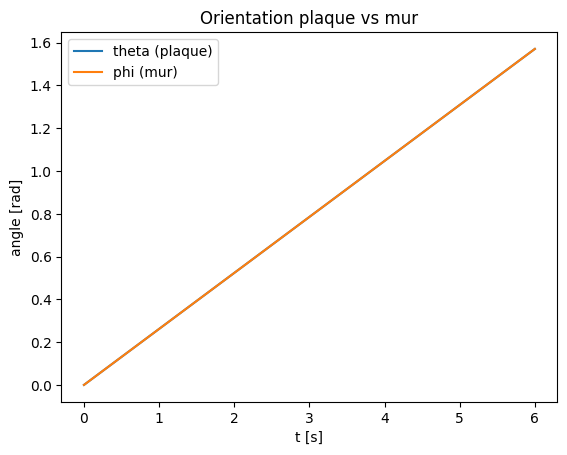

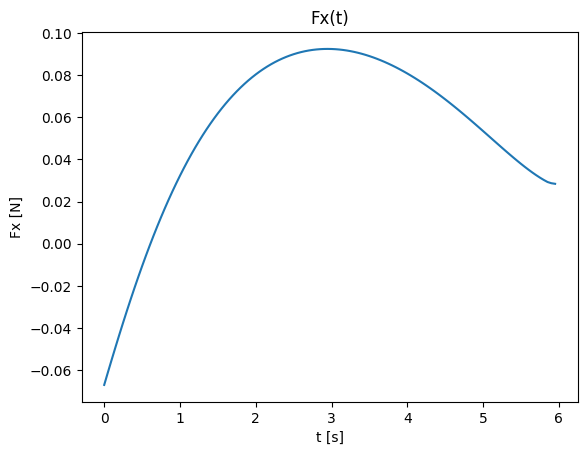

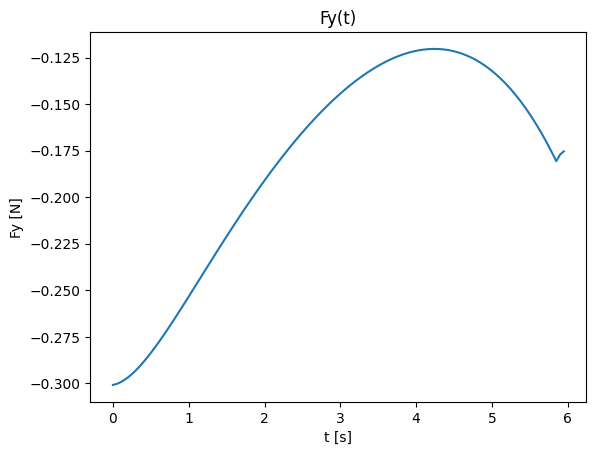

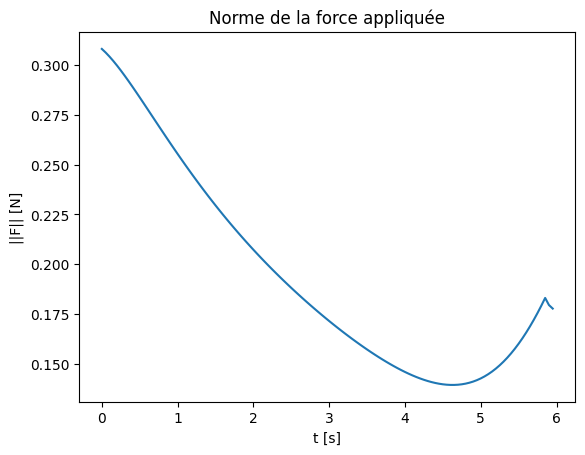

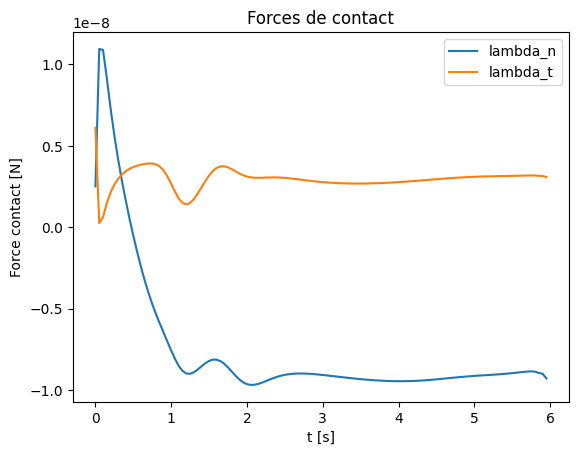

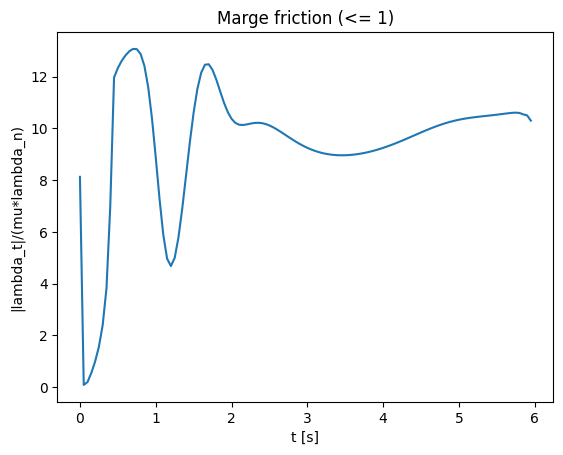

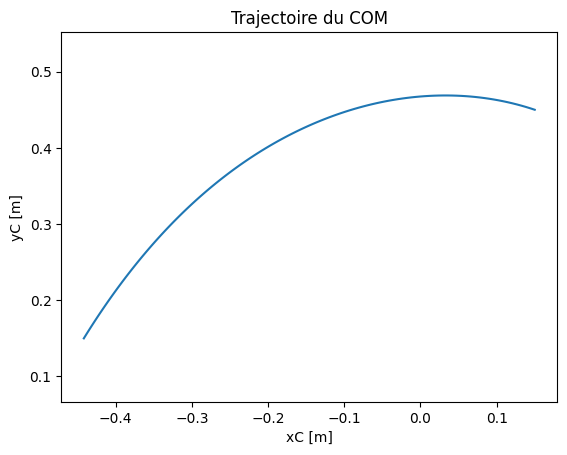

A(0) = 2.0816681711721685e-14 0.2499999999997706


In [64]:
"""
CasADi (IPOPT) — Plaque dynamique + mur motorisé pivotant + contact collant (gap = 0 + v_rel = 0)
avec initial guess "état collé au mur" (position + vitesse + orientation) pour aider la convergence.

Résumé du modèle :
- Mur (wall2) : droite passant par Pw, angle phi(t) PRESCRIT, rotation 0 -> -90° en 6 s.
- Plaque : état (xC, yC, theta, vx, vy, omega), dynamique Newton-Euler.
- Contact au coin inférieur gauche de la plaque (point A) :
    gap g = n(phi)^T (pA - Pw) = 0
    vitesse relative n^T(vA - vW) = 0
    vitesse relative t^T(vA - vW) = 0
    friction adhérence |lambda_t| <= mu*lambda_n, lambda_n >= 0
- Entrée : force au COM (Fx, Fy), ||F|| <= Fmax

Important :
- Le fait d’imposer v_rel = 0 avec Omega constant implique des vitesses initiales cohérentes.
  Ici, on les construit automatiquement via un guess "collé au mur".
"""

import casadi as ca
import numpy as np
import matplotlib.pyplot as plt


def rot_np(angle: float) -> np.ndarray:
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)


def solve_ocp_contact_sticking_with_wall_guess():
    # -----------------------
    # Paramètres
    # -----------------------
    a = 0.300   # m
    b = 0.400   # m
    m = 7.0     # kg
    mu = 0.3
    Fmax = 40.0 # N

    T = 6.0
    dt = 0.05
    N = int(T / dt)

    # Mur motorisé : phi(t) de 0 à -pi/2 en T
    phi0 = 0.0
    phiT = +np.pi / 2
    Omega = (phiT - phi0) / T  # constant (rad/s)

    Pw = np.array([0.0, 0.0], dtype=float)  # pivot mur dans le monde

    # Inertie de la plaque autour du COM (plaque uniforme)
    Icom = (m / 3.0) * (a*a + b*b)

    # Point de contact A : coin inférieur gauche, exprimé COM->A dans le repère corps
    rA_b = np.array([-a/2.0, -b/2.0], dtype=float)

    # -----------------------
    # Poids du coût (tune)
    # -----------------------
    q_theta = 5.0        # encouragement à suivre phi(t) (facilite convergence)
    q_u = 1e-4           # effort
    q_du = 1e-2          # lissage des forces
    q_lam = 1e-6         # petite régularisation sur lambdas
    qT_theta = 200.0
    qT_omega = 50.0

    # -----------------------
    # Initial guess "collé au mur"
    # -----------------------
    # On choisit une distance u0 du point de contact sur le mur par rapport au pivot Pw.
    # Le point A est placé à pA = Pw + u0 * t(phi), et la plaque suit theta ≈ phi.
    # Puis pC = pA - R(theta)*rA_b
    u0 = 0.25  # m (ajustable)

    tgrid = np.linspace(0.0, T, N+1)
    phi_guess = phi0 + Omega * tgrid
    theta_guess = phi_guess.copy()
    omega_guess = np.ones(N+1) * Omega

    pA_guess = np.zeros((N+1, 2), dtype=float)
    pC_guess = np.zeros((N+1, 2), dtype=float)
    vC_guess = np.zeros((N+1, 2), dtype=float)

    for k in range(N+1):
        ph = phi_guess[k]
        # Tangente mur: t(phi) = [-sin(phi), cos(phi)]  (phi=0 => vertical +y)
        tvec = np.array([-np.sin(ph), np.cos(ph)], dtype=float)
        pA_guess[k, :] = Pw + u0 * tvec

        Rk = rot_np(theta_guess[k])
        pC_guess[k, :] = pA_guess[k, :] - (Rk @ rA_b)

    # vitesses du COM par différences finies
    vC_guess[1:, :] = (pC_guess[1:, :] - pC_guess[:-1, :]) / dt
    vC_guess[0, :] = vC_guess[1, :]

    # -----------------------
    # CasADi Opti
    # -----------------------
    opti = ca.Opti()

    # Etats : (xC, yC, theta, vx, vy, omega) sur N+1
    xC = opti.variable(N+1)
    yC = opti.variable(N+1)
    th = opti.variable(N+1)
    vx = opti.variable(N+1)
    vy = opti.variable(N+1)
    om = opti.variable(N+1)

    # Entrées : Fx, Fy sur N
    Fx = opti.variable(N)
    Fy = opti.variable(N)

    # Contact : lambdas sur N
    lam_n = opti.variable(N)
    lam_t = opti.variable(N)

    # -----------------------
    # Contraintes initiales
    # -----------------------
    opti.subject_to(xC[0] == float(pC_guess[0, 0]))
    opti.subject_to(yC[0] == float(pC_guess[0, 1]))
    opti.subject_to(th[0] == float(theta_guess[0]))
    opti.subject_to(vx[0] == float(vC_guess[0, 0]))
    opti.subject_to(vy[0] == float(vC_guess[0, 1]))
    opti.subject_to(om[0] == float(omega_guess[0]))

    # -----------------------
    # Fonctions utilitaires CasADi
    # -----------------------
    def Rot(angle):
        c = ca.cos(angle)
        s = ca.sin(angle)
        return ca.vertcat(
            ca.horzcat(c, -s),
            ca.horzcat(s,  c)
        )

    J = 0

    for k in range(N):
        tk = tgrid[k]
        phi_k = phi0 + Omega * tk

        # Base du mur
        tvec = ca.vertcat(-ca.sin(phi_k), ca.cos(phi_k))  # tangent
        nvec = ca.vertcat( ca.cos(phi_k), ca.sin(phi_k))  # normal (vers +x quand phi=0)

        # Rotation plaque
        Rk = Rot(th[k])

        # Position COM et point de contact A
        pCk = ca.vertcat(xC[k], yC[k])
        rA_world = Rk @ ca.DM(rA_b)     # COM -> A monde
        pAk = pCk + rA_world

        # Vitesse du point A côté plaque: vA = vC + omega * k×rA
        vCk = ca.vertcat(vx[k], vy[k])
        vAk = vCk + om[k] * ca.vertcat(-rA_world[1], rA_world[0])

        # Vitesse du point du mur au même point: vW = Omega * k×(pA - Pw)
        rWk = pAk - ca.DM(Pw)
        vWk = Omega * ca.vertcat(-rWk[1], rWk[0])

        vrel = vAk - vWk

        # -----------------------
        # Contraintes de contact
        # -----------------------
        # gap = 0 : point A sur la droite du mur passant par Pw
        gk = nvec.T @ (pAk - ca.DM(Pw))
        opti.subject_to(gk == 0)

        # pas de glissement (sticking) : vitesse relative nulle dans les deux directions
        # opti.subject_to(tvec.T @ vrel == 0)
        # opti.subject_to(nvec.T @ vrel == 0)

        # friction Coulomb adhérence
        opti.subject_to(lam_n[k] >= 0)
        opti.subject_to(lam_t[k] <=  mu * lam_n[k])
        opti.subject_to(lam_t[k] >= -mu * lam_n[k])

        # borne sur la force appliquée au COM
        opti.subject_to(Fx[k]**2 + Fy[k]**2 <= Fmax**2)

        # Force contact sur la plaque
        Fc = lam_n[k] * nvec + lam_t[k] * tvec

        # -----------------------
        # Dynamique (Euler explicite)
        # -----------------------
        # Translation COM : m aC = F + Fc
        axk = (Fx[k] + Fc[0]) / m
        ayk = (Fy[k] + Fc[1]) / m

        opti.subject_to(xC[k+1] == xC[k] + dt * vx[k])
        opti.subject_to(yC[k+1] == yC[k] + dt * vy[k])
        opti.subject_to(vx[k+1] == vx[k] + dt * axk)
        opti.subject_to(vy[k+1] == vy[k] + dt * ayk)

        # Rotation autour du COM : Icom * alpha = tau_contact
        tau_c = rA_world[0] * Fc[1] - rA_world[1] * Fc[0]
        alphak = tau_c / Icom

        opti.subject_to(th[k+1] == th[k] + dt * om[k])
        opti.subject_to(om[k+1] == om[k] + dt * alphak)

        # -----------------------
        # Coût
        # -----------------------
        # Tracking léger vers la cinématique imposée du mur (facilite la convergence)
        J += q_theta * (th[k] - phi_k)**2

        # Effort + lissage
        J += q_u * (Fx[k]**2 + Fy[k]**2)
        if k < N-1:
            J += q_du * ((Fx[k+1] - Fx[k])**2 + (Fy[k+1] - Fy[k])**2)

        # Régularisation très légère sur lambdas (stabilise)
        J += q_lam * (lam_n[k]**2 + lam_t[k]**2)

    # Terminal
    phi_end = phi0 + Omega * tgrid[N]
    J += qT_theta * (th[N] - phi_end)**2 + qT_omega * (om[N])**2

    opti.minimize(J)

    # -----------------------
    # Initial guesses (crucial)
    # -----------------------
    opti.set_initial(xC, pC_guess[:, 0])
    opti.set_initial(yC, pC_guess[:, 1])
    opti.set_initial(th, theta_guess)
    opti.set_initial(vx, vC_guess[:, 0])
    opti.set_initial(vy, vC_guess[:, 1])
    opti.set_initial(om, omega_guess)

    # Guess forces (vous pouvez modifier si vous voulez)
    Fx_guess = np.zeros(N)
    Fy_guess = np.zeros(N)
    Fx_guess[0] = 10.0
    Fy_guess[0] = 0.0
    opti.set_initial(Fx, Fx_guess)
    opti.set_initial(Fy, Fy_guess)

    # Guess lambdas
    opti.set_initial(lam_n, 30.0)
    opti.set_initial(lam_t, 0.0)

    # -----------------------
    # Solver options
    # -----------------------
    p_opts = {"expand": True}
    s_opts = {
        "max_iter": 8000,
        "tol": 1e-7,
        "acceptable_tol": 1e-5,
        "acceptable_iter": 50,
        "mu_strategy": "adaptive",
        "print_level": 5
    }
    opti.solver("ipopt", p_opts, s_opts)

    sol = opti.solve()

    # -----------------------
    # Extraction
    # -----------------------
    out = {
        "t": tgrid,
        "phi": phi0 + Omega * tgrid,
        "Omega": Omega,
        "xC": sol.value(xC),
        "yC": sol.value(yC),
        "th": sol.value(th),
        "vx": sol.value(vx),
        "vy": sol.value(vy),
        "om": sol.value(om),
        "Fx": sol.value(Fx),
        "Fy": sol.value(Fy),
        "lam_n": sol.value(lam_n),
        "lam_t": sol.value(lam_t),
        "mu": mu,
        "Fmax": Fmax,
    }
    return out


def plot_out(out):
    t = out["t"]
    Fx = out["Fx"]
    Fy = out["Fy"]
    ln = out["lam_n"]
    lt = out["lam_t"]

    plt.figure()
    plt.plot(t, out["th"], label="theta (plaque)")
    plt.plot(t, out["phi"], label="phi (mur)")
    plt.xlabel("t [s]")
    plt.ylabel("angle [rad]")
    plt.title("Orientation plaque vs mur")
    plt.legend()

    plt.figure()
    plt.plot(t[:-1], Fx)
    plt.xlabel("t [s]")
    plt.ylabel("Fx [N]")
    plt.title("Fx(t)")

    plt.figure()
    plt.plot(t[:-1], Fy)
    plt.xlabel("t [s]")
    plt.ylabel("Fy [N]")
    plt.title("Fy(t)")

    plt.figure()
    plt.plot(t[:-1], np.sqrt(Fx**2 + Fy**2))
    plt.xlabel("t [s]")
    plt.ylabel("||F|| [N]")
    plt.title("Norme de la force appliquée")

    plt.figure()
    plt.plot(t[:-1], ln, label="lambda_n")
    plt.plot(t[:-1], lt, label="lambda_t")
    plt.xlabel("t [s]")
    plt.ylabel("Force contact [N]")
    plt.title("Forces de contact")
    plt.legend()

    ratio = np.abs(lt) / (out["mu"] * np.maximum(ln, 1e-9))
    plt.figure()
    plt.plot(t[:-1], ratio)
    plt.xlabel("t [s]")
    plt.ylabel("|lambda_t|/(mu*lambda_n)")
    plt.title("Marge friction (<= 1)")

    plt.figure()
    plt.plot(out["xC"], out["yC"])
    plt.xlabel("xC [m]")
    plt.ylabel("yC [m]")
    plt.title("Trajectoire du COM")
    plt.axis("equal")

    plt.show()


if __name__ == "__main__":
    out = solve_ocp_contact_sticking_with_wall_guess()
    print("max ||F|| =", np.max(np.sqrt(out["Fx"]**2 + out["Fy"]**2)), "N (<= Fmax)")
    ratio = np.abs(out["lam_t"]) / (out["mu"] * np.maximum(out["lam_n"], 1e-9))
    print("max friction ratio =", np.max(ratio), "(<= 1)")
    print("theta(T) =", out["th"][-1], "phi(T) =", out["phi"][-1])
    plot_out(out)

a = 0.3; b = 0.4
rA_b = np.array([-a/2, -b/2])

pAx = []
pAy = []
for k in range(len(out["t"])):
    th = out["th"][k]
    R = np.array([[np.cos(th), -np.sin(th)],
                  [np.sin(th),  np.cos(th)]])
    pA = np.array([out["xC"][k], out["yC"][k]]) + R @ rA_b
    pAx.append(pA[0]); pAy.append(pA[1])

print("A(0) =", pAx[0], pAy[0])



This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3126
Number of nonzeros in inequality constraint Jacobian.:      240
Number of nonzeros in Lagrangian Hessian.............:     1080

Total number of variables............................:     1206
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      966
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.4369460e+00 7.14e-02 2.62e+01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

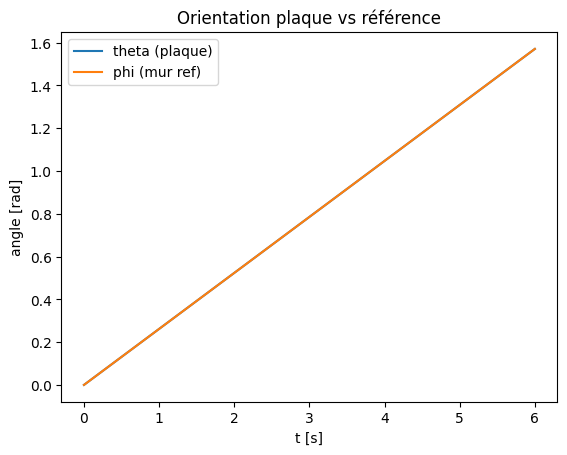

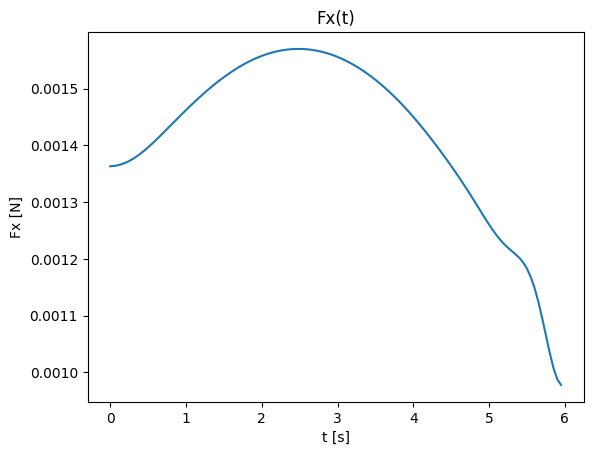

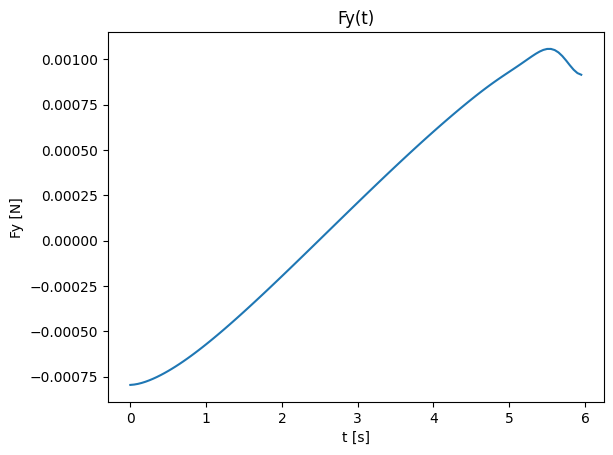

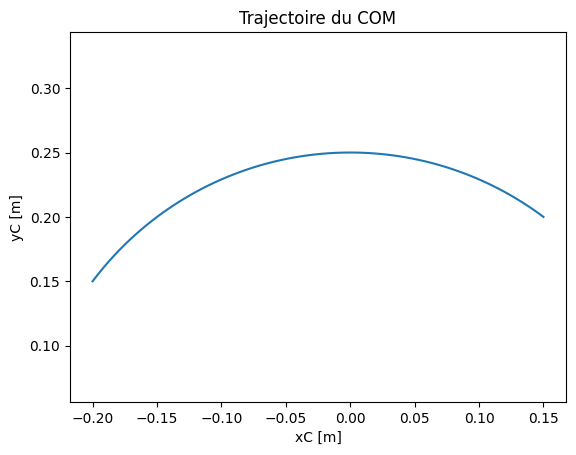

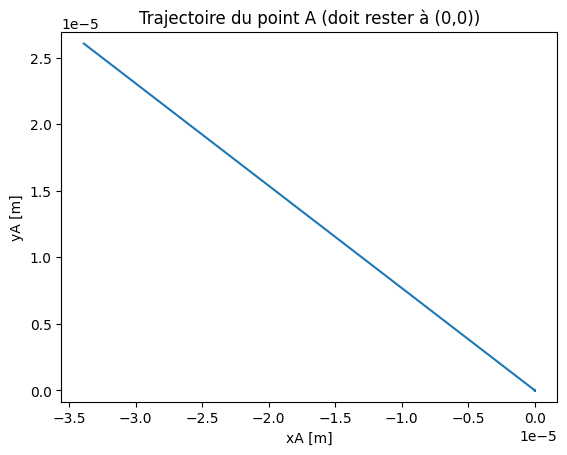

In [65]:
"""
CasADi (IPOPT) — Plaque dynamique + mur motorisé (phi prescrit) + PIVOT FIXE au coin inférieur gauche.

Ce modèle est cohérent avec :
- Le coin inférieur gauche A est FIXÉ au sol au point Pw = (0,0)
- La plaque est un corps rigide en plan : (xC, yC, theta) + (vx, vy, omega)
- On applique une force d'entrée au COM : (Fx, Fy), avec ||F|| <= Fmax
- La liaison pivot impose pA(t) = Pw (pas de translation du coin A)
- La réaction du pivot est modélisée par (Rx, Ry) (pas de cône de friction ici)

Remarque :
- Le mur motorisé n'agit plus comme "contact collant au coin" (sinon contradiction).
- On garde phi(t) uniquement comme référence de suivi d'angle (tracking).
"""

import casadi as ca
import numpy as np
import matplotlib.pyplot as plt


def rot_np(angle: float) -> np.ndarray:
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)


def solve_ocp_pivot_fixed_with_phi_tracking():
    # -----------------------
    # Paramètres
    # -----------------------
    a = 0.300   # m
    b = 0.400   # m
    m = 7.0     # kg
    Fmax = 40.0 # N

    T = 6.0
    dt = 0.05
    N = int(T / dt)

    # Mur motorisé (référence d'angle) : phi(t) de 0 à +pi/2 (anti-horaire)
    phi0 = 0.0
    phiT = +np.pi / 2
    Omega = (phiT - phi0) / T  # constant (rad/s)

    # Pivot fixé au sol
    Pw = np.array([0.0, 0.0], dtype=float)

    # Inertie autour du COM (plaque uniforme)
    Icom = (m / 12.0) * (a*a + b*b)

    # Point A : coin inférieur gauche, exprimé COM->A dans le repère corps
    rA_b = np.array([-a/2.0, -b/2.0], dtype=float)

    # -----------------------
    # Poids du coût
    # -----------------------
    q_theta = 50.0       # tracking theta ~ phi(t)
    q_u = 1e-4           # effort
    q_du = 1e-2          # lissage force
    q_R = 1e-8           # régularisation très faible réaction pivot
    qT_theta = 200.0
    qT_omega = 50.0

    # -----------------------
    # Grille temps + référence
    # -----------------------
    tgrid = np.linspace(0.0, T, N+1)
    phi_ref = phi0 + Omega * tgrid

    # -----------------------
    # Initial guess (pivot fixe)
    # -----------------------
    # Si A est fixé à Pw, alors pC = Pw - R(theta)*rA_b
    theta_guess = phi_ref.copy()
    omega_guess = np.ones(N+1) * Omega

    pC_guess = np.zeros((N+1, 2), dtype=float)
    for k in range(N+1):
        Rk = rot_np(theta_guess[k])
        pC_guess[k, :] = Pw - (Rk @ rA_b)

    vC_guess = np.zeros((N+1, 2), dtype=float)
    vC_guess[1:, :] = (pC_guess[1:, :] - pC_guess[:-1, :]) / dt
    vC_guess[0, :] = vC_guess[1, :]

    # -----------------------
    # CasADi Opti
    # -----------------------
    opti = ca.Opti()

    # Etats : (xC, yC, theta, vx, vy, omega) sur N+1
    xC = opti.variable(N+1)
    yC = opti.variable(N+1)
    th = opti.variable(N+1)
    vx = opti.variable(N+1)
    vy = opti.variable(N+1)
    om = opti.variable(N+1)

    # Entrées : Fx, Fy sur N
    Fx = opti.variable(N)
    Fy = opti.variable(N)

    # Réaction pivot : Rx, Ry sur N (forces appliquées au point A)
    Rx = opti.variable(N)
    Ry = opti.variable(N)

    # -----------------------
    # Contraintes initiales
    # -----------------------
    opti.subject_to(xC[0] == float(pC_guess[0, 0]))
    opti.subject_to(yC[0] == float(pC_guess[0, 1]))
    opti.subject_to(th[0] == float(theta_guess[0]))
    opti.subject_to(vx[0] == float(vC_guess[0, 0]))
    opti.subject_to(vy[0] == float(vC_guess[0, 1]))
    opti.subject_to(om[0] == float(omega_guess[0]))

    # -----------------------
    # Rotation CasADi
    # -----------------------
    def Rot(angle):
        c = ca.cos(angle)
        s = ca.sin(angle)
        return ca.vertcat(
            ca.horzcat(c, -s),
            ca.horzcat(s,  c)
        )

    # -----------------------
    # Objectif
    # -----------------------
    J = 0

    for k in range(N):
        # Référence mur
        phi_k = phi0 + Omega * tgrid[k]

        # Rotation plaque
        Rk = Rot(th[k])

        # Position COM et coin A
        pCk = ca.vertcat(xC[k], yC[k])
        rA_world = Rk @ ca.DM(rA_b)     # COM -> A en monde
        pAk = pCk + rA_world

        # -----------------------
        # CONTRAINTE PIVOT FIXE : pA == Pw
        # -----------------------
        opti.subject_to(pAk[0] == Pw[0])
        opti.subject_to(pAk[1] == Pw[1])

        # Force entrée bornée
        opti.subject_to(Fx[k]**2 + Fy[k]**2 <= Fmax**2)

        # Forces totales sur le COM
        Fk = ca.vertcat(Fx[k], Fy[k])
        Rk_piv = ca.vertcat(Rx[k], Ry[k])  # réaction au pivot, appliquée au point A

        # -----------------------
        # Dynamique translation COM : m aC = F + R
        # -----------------------
        axk = (Fk[0] + Rk_piv[0]) / m
        ayk = (Fk[1] + Rk_piv[1]) / m

        opti.subject_to(xC[k+1] == xC[k] + dt * vx[k])
        opti.subject_to(yC[k+1] == yC[k] + dt * vy[k])
        opti.subject_to(vx[k+1] == vx[k] + dt * axk)
        opti.subject_to(vy[k+1] == vy[k] + dt * ayk)

        # -----------------------
        # Dynamique rotation autour du COM : Icom * alpha = tau_R
        # (la force au COM ne crée pas de couple autour du COM)
        # tau_R = (rA_world x R_piv)
        # -----------------------
        tau_R = rA_world[0] * Rk_piv[1] - rA_world[1] * Rk_piv[0]
        alphak = tau_R / Icom

        opti.subject_to(th[k+1] == th[k] + dt * om[k])
        opti.subject_to(om[k+1] == om[k] + dt * alphak)

        # -----------------------
        # Coût
        # -----------------------
        J += q_theta * (th[k] - phi_k)**2
        J += q_u * (Fx[k]**2 + Fy[k]**2)
        J += q_R * (Rx[k]**2 + Ry[k]**2)

        if k < N-1:
            J += q_du * ((Fx[k+1] - Fx[k])**2 + (Fy[k+1] - Fy[k])**2)

    # Terminal
    phi_end = phi0 + Omega * tgrid[N]
    J += qT_theta * (th[N] - phi_end)**2 + qT_omega * (om[N])**2
    opti.minimize(J)

    # -----------------------
    # Initial guesses
    # -----------------------
    opti.set_initial(xC, pC_guess[:, 0])
    opti.set_initial(yC, pC_guess[:, 1])
    opti.set_initial(th, theta_guess)
    opti.set_initial(vx, vC_guess[:, 0])
    opti.set_initial(vy, vC_guess[:, 1])
    opti.set_initial(om, omega_guess)

    Fx_guess = np.zeros(N)
    Fy_guess = np.zeros(N)
    Fx_guess[0] = 10.0
    Fy_guess[0] = 0.0
    opti.set_initial(Fx, Fx_guess)
    opti.set_initial(Fy, Fy_guess)

    opti.set_initial(Rx, 0.0)
    opti.set_initial(Ry, 0.0)

    # -----------------------
    # Solveur
    # -----------------------
    p_opts = {"expand": True}
    s_opts = {
        "max_iter": 8000,
        "tol": 1e-7,
        "acceptable_tol": 1e-5,
        "acceptable_iter": 50,
        "mu_strategy": "adaptive",
        "print_level": 5
    }
    opti.solver("ipopt", p_opts, s_opts)

    sol = opti.solve()

    out = {
        "t": tgrid,
        "phi": phi0 + Omega * tgrid,
        "Omega": Omega,
        "a": a, "b": b,
        "xC": sol.value(xC),
        "yC": sol.value(yC),
        "th": sol.value(th),
        "vx": sol.value(vx),
        "vy": sol.value(vy),
        "om": sol.value(om),
        "Fx": sol.value(Fx),
        "Fy": sol.value(Fy),
        "Rx": sol.value(Rx),
        "Ry": sol.value(Ry),
        "Pw": Pw,
        "rA_b": rA_b,
    }
    return out


def plot_out(out):
    t = out["t"]
    Fx = out["Fx"]
    Fy = out["Fy"]

    plt.figure()
    plt.plot(t, out["th"], label="theta (plaque)")
    plt.plot(t, out["phi"], label="phi (mur ref)")
    plt.xlabel("t [s]"); plt.ylabel("angle [rad]")
    plt.title("Orientation plaque vs référence")
    plt.legend()

    plt.figure()
    plt.plot(t[:-1], Fx)
    plt.xlabel("t [s]"); plt.ylabel("Fx [N]")
    plt.title("Fx(t)")

    plt.figure()
    plt.plot(t[:-1], Fy)
    plt.xlabel("t [s]"); plt.ylabel("Fy [N]")
    plt.title("Fy(t)")

    plt.figure()
    plt.plot(out["xC"], out["yC"])
    plt.xlabel("xC [m]"); plt.ylabel("yC [m]")
    plt.title("Trajectoire du COM")
    plt.axis("equal")

    # Vérif pivot: A(t) doit être (0,0)
    a = out["a"]; b = out["b"]
    rA_b = np.array([-a/2, -b/2])
    pAx = []; pAy = []
    for k in range(len(t)):
        th = out["th"][k]
        R = np.array([[np.cos(th), -np.sin(th)],
                      [np.sin(th),  np.cos(th)]])
        pA = np.array([out["xC"][k], out["yC"][k]]) + R @ rA_b
        pAx.append(pA[0]); pAy.append(pA[1])
    plt.figure()
    plt.plot(pAx, pAy)
    plt.xlabel("xA [m]"); plt.ylabel("yA [m]")
    plt.title("Trajectoire du point A (doit rester à (0,0))")
    plt.axis("equal")

    plt.show()


if __name__ == "__main__":
    out = solve_ocp_pivot_fixed_with_phi_tracking()
    print("max ||F|| =", np.max(np.sqrt(out["Fx"]**2 + out["Fy"]**2)))
    print("A(0) check should be ~0,0 :")
    a = out["a"]; b = out["b"]
    rA_b = np.array([-a/2, -b/2])
    th0 = out["th"][0]
    R0 = np.array([[np.cos(th0), -np.sin(th0)],
                   [np.sin(th0),  np.cos(th0)]])
    A0 = np.array([out["xC"][0], out["yC"][0]]) + R0 @ rA_b
    print("A(0) =", A0)
    plot_out(out)
